## Airline Tweets

In [50]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
%autosave 120
pd.set_option('display.max_colwidth', 900)

Autosaving every 120 seconds


In [51]:
tweets = pd.read_csv('data/twitter-airline/Tweets.csv', usecols=['text'])
tweets.head(10)

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials to the experience... tacky.
2,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,@VirginAmerica and it's a really big bad thing about it
5,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


In [52]:
import re

HANDLE = '@\w+'
LINK = 'https?://t\.co/\w+'
SPECIAL_CHARS = '&lt;|&lt;|&amp;|#'
def clean(text):
    text = re.sub(HANDLE, ' ', text)
    text = re.sub(LINK, ' ', text)
    text = re.sub(SPECIAL_CHARS, ' ', text)
    return text

tweets['text'] = tweets.text.apply(clean)
tweets.head(10)

,text
0,What said.
1,plus you've added commercials to the experience... tacky.
2,I didn't today... Must mean I need to take another trip!
3,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces they have little recourse"
4,and it's a really big bad thing about it
5,seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,"yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,"Really missed a prime opportunity for Men Without Hats parody, there."
8,"Well, I didn't…but NOW I DO! :-D"
9,"it was amazing, and arrived an hour early. You're too good to me."


## LDA

In [54]:
from gensim.parsing.preprocessing import preprocess_string

tweets = tweets.text.apply(preprocess_string).tolist()

In [55]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

dictionary = corpora.Dictionary(tweets)
corpus = [dictionary.doc2bow(text) for text in tweets]

In [56]:
NUM_TOPICS = 10
ldamodel = LdaModel(corpus, 
                    num_topics = NUM_TOPICS, 
                    id2word=dictionary, passes=15)

In [57]:
ldamodel.print_topics(num_words=6)

[(0,
  '0.046*"help" + 0.029*"book" + 0.029*"flight" + 0.028*"chang" + 0.026*"phone" + 0.023*"ticket"'),
 (1,
  '0.096*"servic" + 0.092*"custom" + 0.018*"answer" + 0.013*"person" + 0.013*"care" + 0.013*"agent"'),
 (2,
  '0.050*"flight" + 0.050*"wait" + 0.047*"hour" + 0.035*"plane" + 0.030*"delai" + 0.026*"gate"'),
 (3,
  '0.160*"thank" + 0.025*"great" + 0.019*"appreci" + 0.018*"follow" + 0.015*"respons" + 0.012*"gui"'),
 (4,
  '0.027*"work" + 0.027*"know" + 0.022*"fly" + 0.019*"let" + 0.019*"plane" + 0.018*"gui"'),
 (5,
  '0.054*"bag" + 0.028*"baggag" + 0.026*"check" + 0.023*"look" + 0.013*"free" + 0.012*"come"'),
 (6,
  '0.032*"fly" + 0.027*"worst" + 0.024*"time" + 0.023*"flight" + 0.022*"airlin" + 0.015*"updat"'),
 (7,
  '0.034*"ye" + 0.028*"luggag" + 0.021*"lost" + 0.018*"bag" + 0.015*"fleek" + 0.015*"fleet"'),
 (8,
  '0.186*"flight" + 0.069*"cancel" + 0.035*"flightl" + 0.025*"tomorrow" + 0.024*"late" + 0.023*"delai"'),
 (9,
  '0.021*"week" + 0.016*"point" + 0.016*"mile" + 0.015*"te

In [31]:
from gensim.models.coherencemodel import CoherenceModel

def calculate_coherence_score(documents, dictionary, model):
    coherence_model = CoherenceModel(model=model, 
                                     texts=documents, 
                                     dictionary=dictionary, 
                                     coherence='c_v')
    return coherence_model.get_coherence()

def get_coherence_values(start, stop):
    for num_topics in range(start, stop):
        print(f'\nCalculating coherence for {num_topics} topics')
        ldamodel = LdaModel(corpus, 
                    num_topics = num_topics, 
                    id2word=dictionary, passes=2)
        coherence = calculate_coherence_score(tweets, 
                                              dictionary, 
                                              ldamodel)
        yield coherence

In [58]:
min_topics, max_topics = 10,30
coherence_scores = list(get_coherence_values(min_topics, max_topics))


Calculating coherence for 10 topics

Calculating coherence for 11 topics

Calculating coherence for 12 topics

Calculating coherence for 13 topics

Calculating coherence for 14 topics

Calculating coherence for 15 topics

Calculating coherence for 16 topics

Calculating coherence for 17 topics

Calculating coherence for 18 topics

Calculating coherence for 19 topics

Calculating coherence for 20 topics

Calculating coherence for 21 topics

Calculating coherence for 22 topics

Calculating coherence for 23 topics

Calculating coherence for 24 topics

Calculating coherence for 25 topics

Calculating coherence for 26 topics

Calculating coherence for 27 topics

Calculating coherence for 28 topics

Calculating coherence for 29 topics


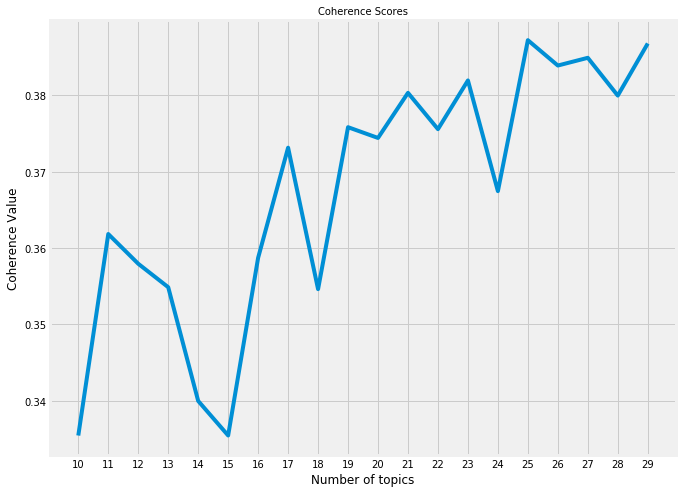

In [59]:
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.ticker import MaxNLocator

style.use('fivethirtyeight')

%matplotlib inline

x = [int(i) for i in range(min_topics, max_topics)]

ax = plt.figure(figsize=(10,8))
plt.xticks(x)
plt.plot(x, coherence_scores)
plt.xlabel('Number of topics')
plt.ylabel('Coherence Value')
plt.title('Coherence Scores', fontsize=10);

#plt.xaxis.set_major_locator(MaxNLocator(integer=True))

In [ ]:
plt.title??